# Advanced Programming for Data Science 2612 

Project for the Advanced programming for data science course at Nova SBE. 

the story_telling.ipynb notetbook contains the explanation of the BicycleData Class and the associated methods.

Students:

- Catarina Balsas		26024
- Diogo Pinheiro		46555
- Wu Zhen Ze			44524
- Aldert Zwart		44612

Gitlab link:
https://gitlab.com/aldert_zwart/group_h.git

# Storytelling bike rental service

The data on mobility of bycicle users was analyzed in a two day hackaton by our team. The code will be presented and showcased in this notebook. The process and findings of the analysis visualized and explained.

All the code for the analysis will be done inside the *BicycleData* class, which will contain several methods portraied below.

In [1]:
import sys
sys.path.append('../Functions/')

from bicycle import BicycleData 

bike = BicycleData()

In [2]:
#Remove the asterisk on the line below and run the cell to check the documentation for the class BicycleData 
#bike? 

In [3]:
bike.__dict__

{'download_status': None, 'open_csv_status': None, 'data_frame': None}

The following attributes of the class *BicycleData* are callable, as seen previously:

- download_status
- open_csv_status
- data_frame

The *download-status* attribute returns the status of the download of the zip file. *open_csv_status* returns the status of the process of unzipping and pandas dataframe feeding. *data_frame* is comprised of a pandas.DataFrame containing the csv file.

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip" #url given by the professor

The url that links to the data is fed to the dowload_zip method in order to extract the data from the server. The method will download the zipped data, if the file does not already exists in the directory.

In [5]:
bike.download_zip(url)

In [6]:
bike.download_status

'No download performed.'

After the successful download of the data, and since it is downloaded as a zipped file, it first needsd to be unzipped for the access of the data to be possible. The method *open_csv* extracts the *hour_csv* file, the most relevant file for our analysis, and a pandas dataframe is created with the data. The hour and date columns are then concatenated and transformed in datetime format to form the dataframes index.

The class attribute *data_frame* returns the pandas dataframe with the data on hourly mobility of bicycle users.

In [7]:
bike.open_csv()

In [8]:
bike.data_frame

instant      dteday  season  yr  mnth  hr  holiday  \
index                                                                     
2011-01-01 00:00:00        1  2011-01-01       1   0     1   0        0   
2011-01-01 01:00:00        2  2011-01-01       1   0     1   1        0   
2011-01-01 02:00:00        3  2011-01-01       1   0     1   2        0   
2011-01-01 03:00:00        4  2011-01-01       1   0     1   3        0   
2011-01-01 04:00:00        5  2011-01-01       1   0     1   4        0   
...                      ...         ...     ...  ..   ...  ..      ...   
2012-12-31 19:00:00    17375  2012-12-31       1   1    12  19        0   
2012-12-31 20:00:00    17376  2012-12-31       1   1    12  20        0   
2012-12-31 21:00:00    17377  2012-12-31       1   1    12  21        0   
2012-12-31 22:00:00    17378  2012-12-31       1   1    12  22        0   
2012-12-31 23:00:00    17379  2012-12-31       1   1    12  23        0   

                     weekday  workingday  weathersit  temp   atemp   hum  \
index                                                                      
2011-01-01 00:00:00        6           0           1  0.24  0.2879  0.81   
2011-01-01 01:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 02:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 03:00:00        6           0           1  0.24  0.2879  0.75   
2011-01-01 04:00:00        6           0           1  0.24  0.2879  0.75   
...                      ...         ...         ...   ...     ...   ...   
2012-12-31 19:00:00        1           1           2  0.26  0.2576  0.60   
2012-12-31 20:00:00        1           1           2  0.26  0.2576  0.60   
2012-12-31 21:00:00        1           1           1  0.26  0.2576  0.60   
2012-12-31 22:00:00        1           1           1  0.26  0.2727  0.56   
2012-12-31 23:00:00        1           1           1  0.26  0.2727  0.65   

                     windspeed  casual  registered  cnt  
index                                                    
2011-01-01 00:00:00     0.0000       3          13   16  
2011-01-01 01:00:00     0.0000       8          32   40  
2011-01-01 02:00:00     0.0000       5          27   32  
2011-01-01 03:00:00     0.0000       3          10   13  
2011-01-01 04:00:00     0.0000       0           1    1  
...                        ...     ...         ...  ...  
2012-12-31 19:00:00     0.1642      11         108  119  
2012-12-31 20:00:00     0.1642       8          81   89  
2012-12-31 21:00:00     0.1642       7          83   90  
2012-12-31 22:00:00     0.1343      13          48   61  
2012-12-31 23:00:00     0.1343      12          37   49  

[17379 rows x 17 columns]

In [9]:
bike.open_csv_status

'csv succesfully opened'

The first study of the data was made through the plotting of a correlation matrix between the features of the dataset. The method *plot_corr_matrix* outputs the correlation matrix of the most relevant features.

A high correlation between the *cnt* (count) feature, that counts the number of active cyclists at any given time, and another feature may signify some causality between them. This relation will have to be explored further.

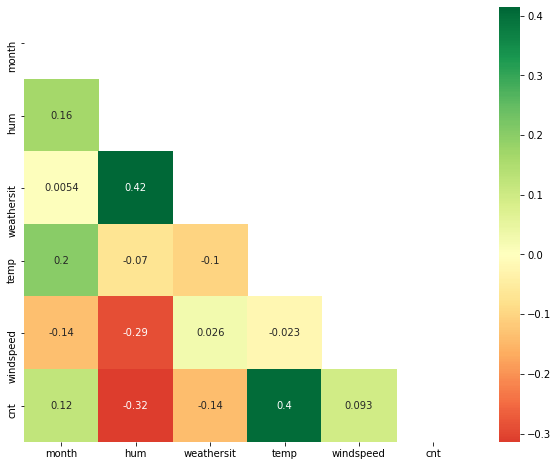

In [11]:
bike.plot_corr_matrix()

From the matrix displayed above, one could observe that that there is a high correlation between temperature and the number of people using the bicycle rental service. 

In addition, *weathersit* is correlated with the humidity (0.42), which cornfirms the weathersit variable, as it gets higher (i.e. the weather is getting worse as number 4 represents; heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), the humidity also rises. 

Negative correlation between humidity and number of people using the bicycle rental service, as bad weather disencourages the bicycle rental service. 

Next, we want to visualize the distribution of bicycle rentals. With the *week_plotting* method, which outputs a graph with the distribution in a given week chosen by the user, we are able to vizualize the data, and hopefully, draw some preliminary insights from it.

Choose the week to plot


 97


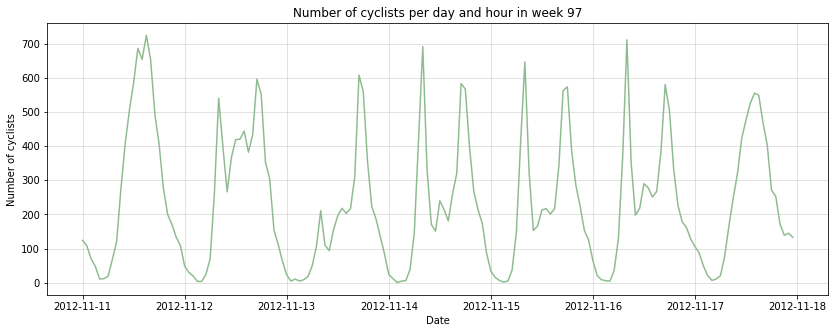

In [12]:
bike.week_plotting()

Choose the week to plot


 43


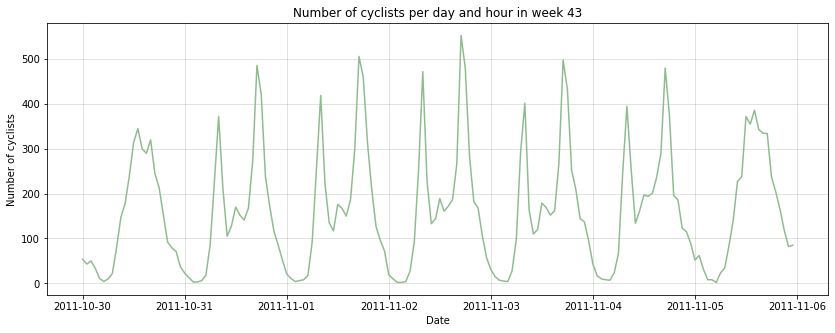

In [13]:
bike.week_plotting()

The weekly plot represents the distribution of number of cyclists in a given week chosen by the user. The most relavant fluctuation is the daily flucuation where one could observe 7 increases, one for each day of the week.

Within each daily increase it is also observeable a peak in the beginning and another in the end, that could be related to the peak hours in the moring and afternoon. 

The magnitude of changes over the weeks can be attributed to seasonality of the dataset. That seasonality will be further explored by the next method, *plot_bar_chart*, that plots the average monthly bicycle rentals.

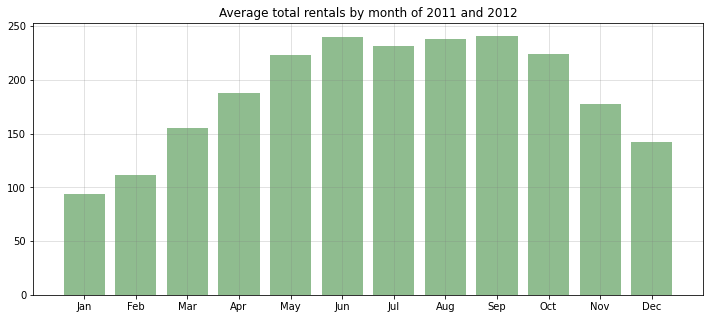

In [14]:
bike.plot_bar_chart()

As observed, bicycle rentals have a peak in the summer months of June, July, August and September, and slowly decline from there hitting the lowest point in January. 

This finding confirms seasonality is present in bicycle rentals. Moreover, it confirms the previous insight from the correlation matrix, that weather, expecially temperature, is a decisive factor for bicycle rentals.

Finally, a detailed analysis of monthly distribution was performed, by showcasing the average week of bicycle rentals in a month chosen by the user.

Please select the month: June


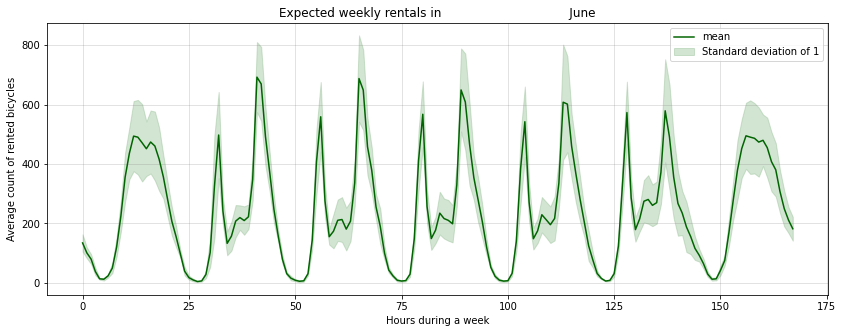

In [15]:
bike.forecast()

In the graph above, the darker green line represents the average number of bicycle rentals in a month. The lighter area corresponds to the interval of the distrinution one standard deviation away from the mean. Therefore, from this analysis, we are able to evaluate not only the average distribution in any given month, but also how that predicted number of rentals is likely to vary at any given time.

As observed, a higher range of probable values is observed in the weekends, whilst during night periods the range of likely values stays very close to the average, so at this time the rentals behaviour is very similar throughout time. 

In conclusion, there is more volatility over the weekend, and during peak weekdays hours, making it harder to predict volume accurately.